In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import folium
import mapclassify
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,ConfusionMatrixDisplay,classification_report,confusion_matrix

In [79]:
obj = gpd.read_file("D:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\UMARS\\clusters_UMARS_santarem.shp")

In [80]:
interpol = gpd.read_file("D:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\SOCIOECONOMICO\\TESTE\\base_socioeconomica_interpolado.shp")

In [81]:
obj

ID  HC_6  HC_7  MODES_10  \
0         5     1     0         3   
1         6     2     0         3   
2        10     1     1         0   
3        11     1     1         0   
4        12     1     1         0   
...     ...   ...   ...       ...   
6296  14338     5     1         2   
6297  14339     5     1         2   
6298  14340     5     1         2   
6299  14392     5     1         2   
6300  14393     5     1         2   

                                               geometry  
0     POLYGON ((752688.911 9722816.546, 752689.345 9...  
1     POLYGON ((752789.095 9722816.113, 752789.529 9...  
2     POLYGON ((753189.831 9722814.381, 753190.263 9...  
3     POLYGON ((753290.015 9722813.949, 753290.447 9...  
4     POLYGON ((753390.199 9722813.517, 753390.631 9...  
...                                                 ...  
6296  POLYGON ((751430.790 9733012.497, 751431.221 9...  
6297  POLYGON ((751530.947 9733012.067, 751531.377 9...  
6298  POLYGON ((751631.104 9733011.636, 751631.534 9...  
6299  POLYGON ((751230.907 9733113.276, 751231.338 9...  
6300  POLYGON ((751331.064 9733112.845, 751331.495 9...  

[6301 rows x 5 columns]

In [82]:
obj.explore(column="MODES_10", tooltip="MODES_10",tiles="OpenStreetMap",
             categorical = True, cmap='Set2', style_kwds=dict(color="grey", weight=0.01))

In [107]:
index_names = obj[(obj['MODES_10'] == 6) | (obj['MODES_10'] == 2) | (obj['MODES_10'] == 3)].index
  
# drop these given row
# indexes from dataFrame
obj.drop(index_names, inplace = True)
  
obj

ID  MODES_10  avg_inv_ho  p_per_hous     dr_15     dr_65  sex_ratio  \
2        10         0    0.964104    0.534070  0.571612  0.000000   0.884068   
3        11         0    0.964109    0.534072  0.571613  0.000000   0.884072   
4        12         0    0.964114    0.534075  0.571614  0.000000   0.884075   
5        30         0    0.150679    0.697838  0.699498  0.505747   0.749402   
6        31         0    0.150681    0.697851  0.699502  0.505750   0.749410   
...     ...       ...         ...         ...       ...       ...        ...   
6103  14189         5    0.939595    0.644947  0.392077  0.879046   0.562574   
6104  14220         1    0.170044    0.828559  0.738372  0.620760   0.870826   
6105  14221         8    0.242705    0.834914  0.700907  0.607741   0.831944   
6106  14222         8    0.376194    0.822536  0.636467  0.648676   0.735567   
6107  14223         0    0.472269    0.804381  0.589498  0.705302   0.659732   

      literacy  inad_sewag  inad_water  inap_waste  \
2     0.995257    0.042205    0.989345    0.000000   
3     0.995262    0.042206    0.989350    0.000000   
4     0.995267    0.042206    0.989356    0.000000   
5     0.857596    0.147709    0.644529    0.000000   
6     0.857613    0.147711    0.644542    0.000000   
...        ...         ...         ...         ...   
6103  0.972009    0.934913    0.012914    0.000704   
6104  0.847362    0.880228    0.835822    0.317355   
6105  0.860580    0.739826    0.675911    0.250816   
6106  0.891187    0.484059    0.435494    0.158866   
6107  0.915646    0.300815    0.282976    0.104332   

                                               geometry  
2     POLYGON ((753189.831 9722814.381, 753190.263 9...  
3     POLYGON ((753290.015 9722813.949, 753290.447 9...  
4     POLYGON ((753390.199 9722813.517, 753390.631 9...  
5     POLYGON ((760603.631 9722783.078, 760604.045 9...  
6     POLYGON ((760703.820 9722782.664, 760704.234 9...  
...                                                 ...  
6103  POLYGON ((754334.099 9732700.362, 754334.522 9...  
6104  POLYGON ((751329.771 9732813.093, 751330.202 9...  
6105  POLYGON ((751429.928 9732812.662, 751430.359 9...  
6106  POLYGON ((751530.086 9732812.231, 751530.516 9...  
6107  POLYGON ((751630.243 9732811.801, 751630.674 9...  

[5688 rows x 12 columns]

In [108]:
interpol

ID    B_V001     B_V002  D01_V002  D01_V015  D01_V019  D01_V020  \
0         5  1.136187   3.166819  1.136187  1.015316  0.048348       0.0   
1         6  1.136835   3.168625  1.136835  1.015895  0.048376       0.0   
2        10  1.139489   3.176022  1.139489  1.018267  0.048489       0.0   
3        11  1.140168   3.177916  1.140168  1.018874  0.048518       0.0   
4        12  1.140854   3.179827  1.140854  1.019487  0.048547       0.0   
...     ...       ...        ...       ...       ...       ...       ...   
6296  14338  4.047503  17.302302  4.047503  3.429563  3.831224       0.0   
6297  14339  4.047508  17.302324  4.047508  3.429568  3.831229       0.0   
6298  14340  4.047513  17.302345  4.047513  3.429572  3.831234       0.0   
6299  14392  4.047493  17.302260  4.047493  3.429555  3.831215       0.0   
6300  14393  4.047498  17.302282  4.047498  3.429559  3.831220       0.0   

      D01_V021  D01_V022  D01_V023  ...   avg_inv_ho  p_per_hous     dr_15  \
0          0.0       0.0  0.000000  ...  5300.708221    2.762917  0.241667   
1          0.0       0.0  0.000000  ...  5300.734571    2.762930  0.241667   
2          0.0       0.0  0.000000  ...  5300.842229    2.762986  0.241669   
3          0.0       0.0  0.000000  ...  5300.869710    2.763001  0.241670   
4          0.0       0.0  0.000000  ...  5300.897412    2.763015  0.241670   
...        ...       ...       ...  ...          ...         ...       ...   
6296       0.0       0.0  0.123588  ...   664.678417    4.264274  0.323028   
6297       0.0       0.0  0.123588  ...   664.678419    4.264274  0.323028   
6298       0.0       0.0  0.123588  ...   664.678421    4.264274  0.323028   
6299       0.0       0.0  0.123588  ...   664.678413    4.264274  0.323028   
6300       0.0       0.0  0.123588  ...   664.678415    4.264274  0.323028   

         dr_65  sex_ratio  literacy  inad_sewag  inad_water  inap_waste  \
0     0.000000   1.175231  1.012366    0.042182    0.885821    0.000000   
1     0.000000   1.175235  1.012371    0.042182    0.885825    0.000000   
2     0.000000   1.175254  1.012392    0.042183    0.885843    0.000000   
3     0.000000   1.175259  1.012397    0.042183    0.885848    0.000000   
4     0.000000   1.175264  1.012403    0.042183    0.885852    0.000000   
...        ...        ...       ...         ...         ...         ...   
6296  0.087449   1.194562  0.852855    0.974691    0.845240    0.076148   
6297  0.087449   1.194562  0.852855    0.974691    0.845240    0.076148   
6298  0.087449   1.194562  0.852855    0.974691    0.845240    0.076148   
6299  0.087449   1.194562  0.852855    0.974691    0.845240    0.076148   
6300  0.087449   1.194562  0.852855    0.974691    0.845240    0.076148   

                                               geometry  
0     POLYGON ((752688.911 9722816.546, 752689.345 9...  
1     POLYGON ((752789.095 9722816.113, 752789.529 9...  
2     POLYGON ((753189.831 9722814.381, 753190.263 9...  
3     POLYGON ((753290.015 9722813.949, 753290.447 9...  
4     POLYGON ((753390.199 9722813.517, 753390.631 9...  
...                                                 ...  
6296  POLYGON ((751430.790 9733012.497, 751431.221 9...  
6297  POLYGON ((751530.947 9733012.067, 751531.377 9...  
6298  POLYGON ((751631.104 9733011.636, 751631.534 9...  
6299  POLYGON ((751230.907 9733113.276, 751231.338 9...  
6300  POLYGON ((751331.064 9733112.845, 751331.495 9...  

[6301 rows x 79 columns]

In [109]:
obj =  obj[['ID','MODES_10']].merge(interpol, left_on='ID', right_on = 'ID')

In [110]:
obj.columns

Index(['ID', 'MODES_10', 'B_V001', 'B_V002', 'D01_V002', 'D01_V015',
       'D01_V019', 'D01_V020', 'D01_V021', 'D01_V022', 'D01_V023', 'D01_V039',
       'D01_V040', 'D01_V041', 'D01_V042', 'DR_V002', 'P01_V078', 'P13_V001',
       'P13_V022', 'P13_V036', 'P13_V037', 'P13_V038', 'P13_V039', 'P13_V040',
       'P13_V041', 'P13_V042', 'P13_V043', 'P13_V044', 'P13_V045', 'P13_V046',
       'P13_V047', 'P13_V048', 'P13_V099', 'P13_V100', 'P13_V101', 'P13_V102',
       'P13_V103', 'P13_V104', 'P13_V105', 'P13_V106', 'P13_V107', 'P13_V108',
       'P13_V109', 'P13_V110', 'P13_V111', 'P13_V112', 'P13_V113', 'P13_V114',
       'P13_V115', 'P13_V116', 'P13_V117', 'P13_V118', 'P13_V119', 'P13_V120',
       'P13_V121', 'P13_V122', 'P13_V123', 'P13_V124', 'P13_V125', 'P13_V126',
       'P13_V127', 'P13_V128', 'P13_V129', 'P13_V130', 'P13_V131', 'P13_V132',
       'P13_V133', 'P13_V134', 'P12_V002', 'P11_V002', 'avg_inv_ho',
       'p_per_hous', 'dr_15', 'dr_65', 'sex_ratio', 'literacy', 'inad_sew

In [111]:
obj = obj[['ID','MODES_10','avg_inv_ho',
       'p_per_hous', 'dr_15', 'dr_65', 'sex_ratio', 'literacy', 'inad_sewag',
       'inad_water', 'inap_waste', 'geometry']]

In [112]:
obj

ID  MODES_10   avg_inv_ho  p_per_hous     dr_15     dr_65  sex_ratio  \
0        10         0  5300.842229    2.762986  0.241669  0.000000   1.175254   
1        11         0  5300.869710    2.763001  0.241670  0.000000   1.175259   
2        12         0  5300.897412    2.763015  0.241670  0.000000   1.175264   
3        30         0   828.461596    3.610235  0.295737  0.070238   0.996234   
4        31         0   828.477565    3.610304  0.295739  0.070238   0.996244   
...     ...       ...          ...         ...       ...       ...        ...   
5683  14189         5  5166.083202    3.336604  0.165764  0.122081   0.747870   
5684  14220         1   934.935241    4.286514  0.312173  0.086210   1.157650   
5685  14221         8  1334.440364    4.319390  0.296333  0.084402   1.105961   
5686  14222         8  2068.393250    4.255353  0.269089  0.090087   0.977841   
5687  14223         0  2596.632676    4.161430  0.249231  0.097952   0.877028   

      literacy  inad_sewag  inad_water  inap_waste  \
0     1.012392    0.042183    0.885843    0.000000   
1     1.012397    0.042183    0.885848    0.000000   
2     1.012403    0.042183    0.885852    0.000000   
3     0.872362    0.147630    0.577101    0.000000   
4     0.872378    0.147633    0.577112    0.000000   
...        ...         ...         ...         ...   
5683  0.988744    0.934418    0.011563    0.000148   
5684  0.861951    0.879762    0.748381    0.066689   
5685  0.875397    0.739435    0.605199    0.052706   
5686  0.906530    0.483803    0.389934    0.033384   
5687  0.931410    0.300655    0.253372    0.021924   

                                               geometry  
0     POLYGON ((753189.831 9722814.381, 753190.263 9...  
1     POLYGON ((753290.015 9722813.949, 753290.447 9...  
2     POLYGON ((753390.199 9722813.517, 753390.631 9...  
3     POLYGON ((760603.631 9722783.078, 760604.045 9...  
4     POLYGON ((760703.820 9722782.664, 760704.234 9...  
...                                                 ...  
5683  POLYGON ((754334.099 9732700.362, 754334.522 9...  
5684  POLYGON ((751329.771 9732813.093, 751330.202 9...  
5685  POLYGON ((751429.928 9732812.662, 751430.359 9...  
5686  POLYGON ((751530.086 9732812.231, 751530.516 9...  
5687  POLYGON ((751630.243 9732811.801, 751630.674 9...  

[5688 rows x 12 columns]

In [113]:
obj.iloc[:,2:-1]

avg_inv_ho  p_per_hous     dr_15     dr_65  sex_ratio  literacy  \
0     5300.842229    2.762986  0.241669  0.000000   1.175254  1.012392   
1     5300.869710    2.763001  0.241670  0.000000   1.175259  1.012397   
2     5300.897412    2.763015  0.241670  0.000000   1.175264  1.012403   
3      828.461596    3.610235  0.295737  0.070238   0.996234  0.872362   
4      828.477565    3.610304  0.295739  0.070238   0.996244  0.872378   
...           ...         ...       ...       ...        ...       ...   
5683  5166.083202    3.336604  0.165764  0.122081   0.747870  0.988744   
5684   934.935241    4.286514  0.312173  0.086210   1.157650  0.861951   
5685  1334.440364    4.319390  0.296333  0.084402   1.105961  0.875397   
5686  2068.393250    4.255353  0.269089  0.090087   0.977841  0.906530   
5687  2596.632676    4.161430  0.249231  0.097952   0.877028  0.931410   

      inad_sewag  inad_water  inap_waste  
0       0.042183    0.885843    0.000000  
1       0.042183    0.885848    0.000000  
2       0.042183    0.885852    0.000000  
3       0.147630    0.577101    0.000000  
4       0.147633    0.577112    0.000000  
...          ...         ...         ...  
5683    0.934418    0.011563    0.000148  
5684    0.879762    0.748381    0.066689  
5685    0.739435    0.605199    0.052706  
5686    0.483803    0.389934    0.033384  
5687    0.300655    0.253372    0.021924  

[5688 rows x 9 columns]

In [114]:
dummy = 0

obj.iloc[:,2:-1] = obj.iloc[:,2:-1].fillna(dummy)

obj.iloc[:,2:-1] =(obj.iloc[:,2:-1] - obj.iloc[:,2:-1].min())/(obj.iloc[:,2:-1].max() - obj.iloc[:,2:-1].min())
obj.iloc[:,2:-1]

avg_inv_ho  p_per_hous     dr_15     dr_65  sex_ratio  literacy  \
0       0.964104    0.534070  0.571612  0.000000   0.884068  0.995257   
1       0.964109    0.534072  0.571613  0.000000   0.884072  0.995262   
2       0.964114    0.534075  0.571614  0.000000   0.884075  0.995267   
3       0.150679    0.697838  0.699498  0.505747   0.749402  0.857596   
4       0.150681    0.697851  0.699502  0.505750   0.749410  0.857613   
...          ...         ...       ...       ...        ...       ...   
5683    0.939595    0.644947  0.392077  0.879046   0.562574  0.972009   
5684    0.170044    0.828559  0.738372  0.620760   0.870826  0.847362   
5685    0.242705    0.834914  0.700907  0.607741   0.831944  0.860580   
5686    0.376194    0.822536  0.636467  0.648676   0.735567  0.891187   
5687    0.472269    0.804381  0.589498  0.705302   0.659732  0.915646   

      inad_sewag  inad_water  inap_waste  
0       0.042205    0.989345    0.000000  
1       0.042206    0.989350    0.000000  
2       0.042206    0.989356    0.000000  
3       0.147709    0.644529    0.000000  
4       0.147711    0.644542    0.000000  
...          ...         ...         ...  
5683    0.934913    0.012914    0.000704  
5684    0.880228    0.835822    0.317355  
5685    0.739826    0.675911    0.250816  
5686    0.484059    0.435494    0.158866  
5687    0.300815    0.282976    0.104332  

[5688 rows x 9 columns]

In [115]:
X = pd.DataFrame(obj.iloc[:,2:-1])
Y = pd.DataFrame(obj['MODES_10']).to_numpy()

In [116]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state=42)

In [150]:
parametros = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':[2,4,5],
              'min_samples_split':[10,20,30, None],
              'min_samples_leaf': [10,20,30, None]
             }

In [151]:
modelo = GridSearchCV(estimator = DecisionTreeClassifier(), verbose=2, param_grid = parametros, scoring='accuracy', n_jobs=-1, cv=5)

In [152]:
modelo.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


C:\Users\brdia\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
420 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\brdia\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\brdia\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\brdia\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 273, in fit
    check_scalar(
  File "C:

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5],
                         'min_samples_leaf': [10, 20, 30, None],
                         'min_samples_split': [10, 20, 30, None],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [153]:
modelo.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'splitter': 'best'}

In [154]:
modelo.best_score_

0.6513417148477645

In [155]:
modelo.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30)

In [156]:
y_pred = modelo.predict(x_test)

<BarContainer object of 9 artists>

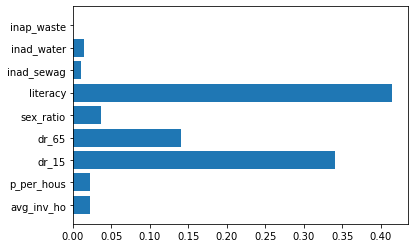

In [157]:
plt.barh(x_test.columns, modelo.best_estimator_.feature_importances_ )

In [158]:
macro = f1_score(y_test, y_pred, average = 'macro')
wei = f1_score(y_test, y_pred, average = 'weighted')
accuracy = accuracy_score(y_test, y_pred)

results = {'F1_Score_Macro': macro,
             'F1_Score_Weighted': wei,
             'Global Acuraccy': accuracy 
            }

pd.DataFrame.from_dict(results, orient='index', dtype=None, columns=['Métricas'])

Métricas
F1_Score_Macro     0.583718
F1_Score_Weighted  0.632159
Global Acuraccy    0.647335

In [159]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[658  49  30  65]
 [102  80  25  92]
 [  9   3 164  43]
 [120  31  33 203]]
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       802
           1       0.49      0.27      0.35       299
           5       0.65      0.75      0.70       219
           8       0.50      0.52      0.51       387

    accuracy                           0.65      1707
   macro avg       0.60      0.59      0.58      1707
weighted avg       0.63      0.65      0.63      1707



In [160]:
data = {'Reference': y_test.flatten(), 'Predicted': y_pred}
df = pd.DataFrame(data, columns = ['Reference','Predicted'])
mc = pd.crosstab(df['Reference'], df['Predicted'], rownames=['Reference'], colnames=['Predicted'])

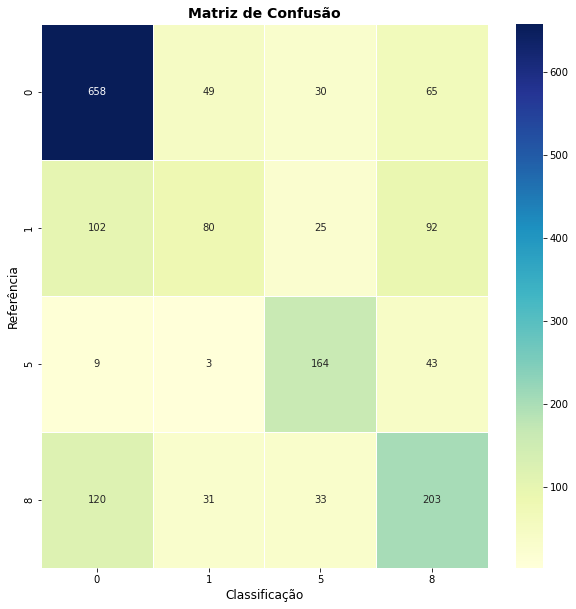

In [161]:
plt.figure(figsize=(10,10))
sns.heatmap(mc, annot=True,fmt='g',  cmap = 'YlGnBu',linewidths=.5)
plt.title('Matriz de Confusão', fontweight='bold', fontsize=14)
plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Referência',fontsize=12)
plt.show()

[Text(0.41346153846153844, 0.9166666666666666, 'X[5] <= 0.87\ngini = 0.681\nsamples = 3981\nvalue = [1871, 696, 510, 904]'),
 Text(0.17307692307692307, 0.75, 'X[5] <= 0.759\ngini = 0.381\nsamples = 1663\nvalue = [1281, 159, 12, 211]'),
 Text(0.07692307692307693, 0.5833333333333334, 'X[6] <= 0.864\ngini = 0.058\nsamples = 271\nvalue = [263, 4, 3, 1]'),
 Text(0.05128205128205128, 0.4166666666666667, 'X[1] <= 0.152\ngini = 0.016\nsamples = 256\nvalue = [254, 1, 0, 1]'),
 Text(0.02564102564102564, 0.25, 'gini = 0.047\nsamples = 83\nvalue = [81, 1, 0, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 173\nvalue = [173, 0, 0, 0]'),
 Text(0.10256410256410256, 0.4166666666666667, 'gini = 0.56\nsamples = 15\nvalue = [9, 3, 3, 0]'),
 Text(0.2692307692307692, 0.5833333333333334, 'X[3] <= 0.329\ngini = 0.43\nsamples = 1392\nvalue = [1018, 155, 9, 210]'),
 Text(0.1794871794871795, 0.4166666666666667, 'X[0] <= 0.139\ngini = 0.528\nsamples = 517\nvalue = [329, 115, 5, 68]'),
 Text(0.12820

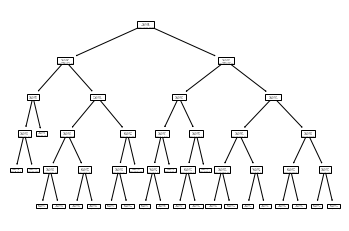

In [162]:
from sklearn import tree

tree.plot_tree(modelo.best_estimator_)

In [163]:
clf = modelo.best_estimator_

In [164]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 47 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 5] <= 0.8697060346603394 else to node 20.
	node=1 is a split node: go to node 2 if X[:, 5] <= 0.7585215270519257 else to node 7.
		node=2 is a split node: go to node 3 if X[:, 6] <= 0.8642899096012115 else to node 6.
			node=3 is a split node: go to node 4 if X[:, 1] <= 0.1521872580051422 else to node 5.
				node=4 is a leaf node.
				node=5 is a leaf node.
			node=6 is a leaf node.
		node=7 is a split node: go to node 8 if X[:, 3] <= 0.3289834260940552 else to node 15.
			node=8 is a split node: go to node 9 if X[:, 0] <= 0.13868620246648788 else to node 12.
				node=9 is a split node: go to node 10 if X[:, 6] <= 0.5556784272193909 else to node 11.
					node=10 is a leaf node.
					node=11 is a leaf node.
				node=12 is a split node: go to node 13 if X[:, 5] <= 0.8475048243999481 else to node 14.
					node=13 is a leaf node.
					node=14 is a leaf node.
			node=15

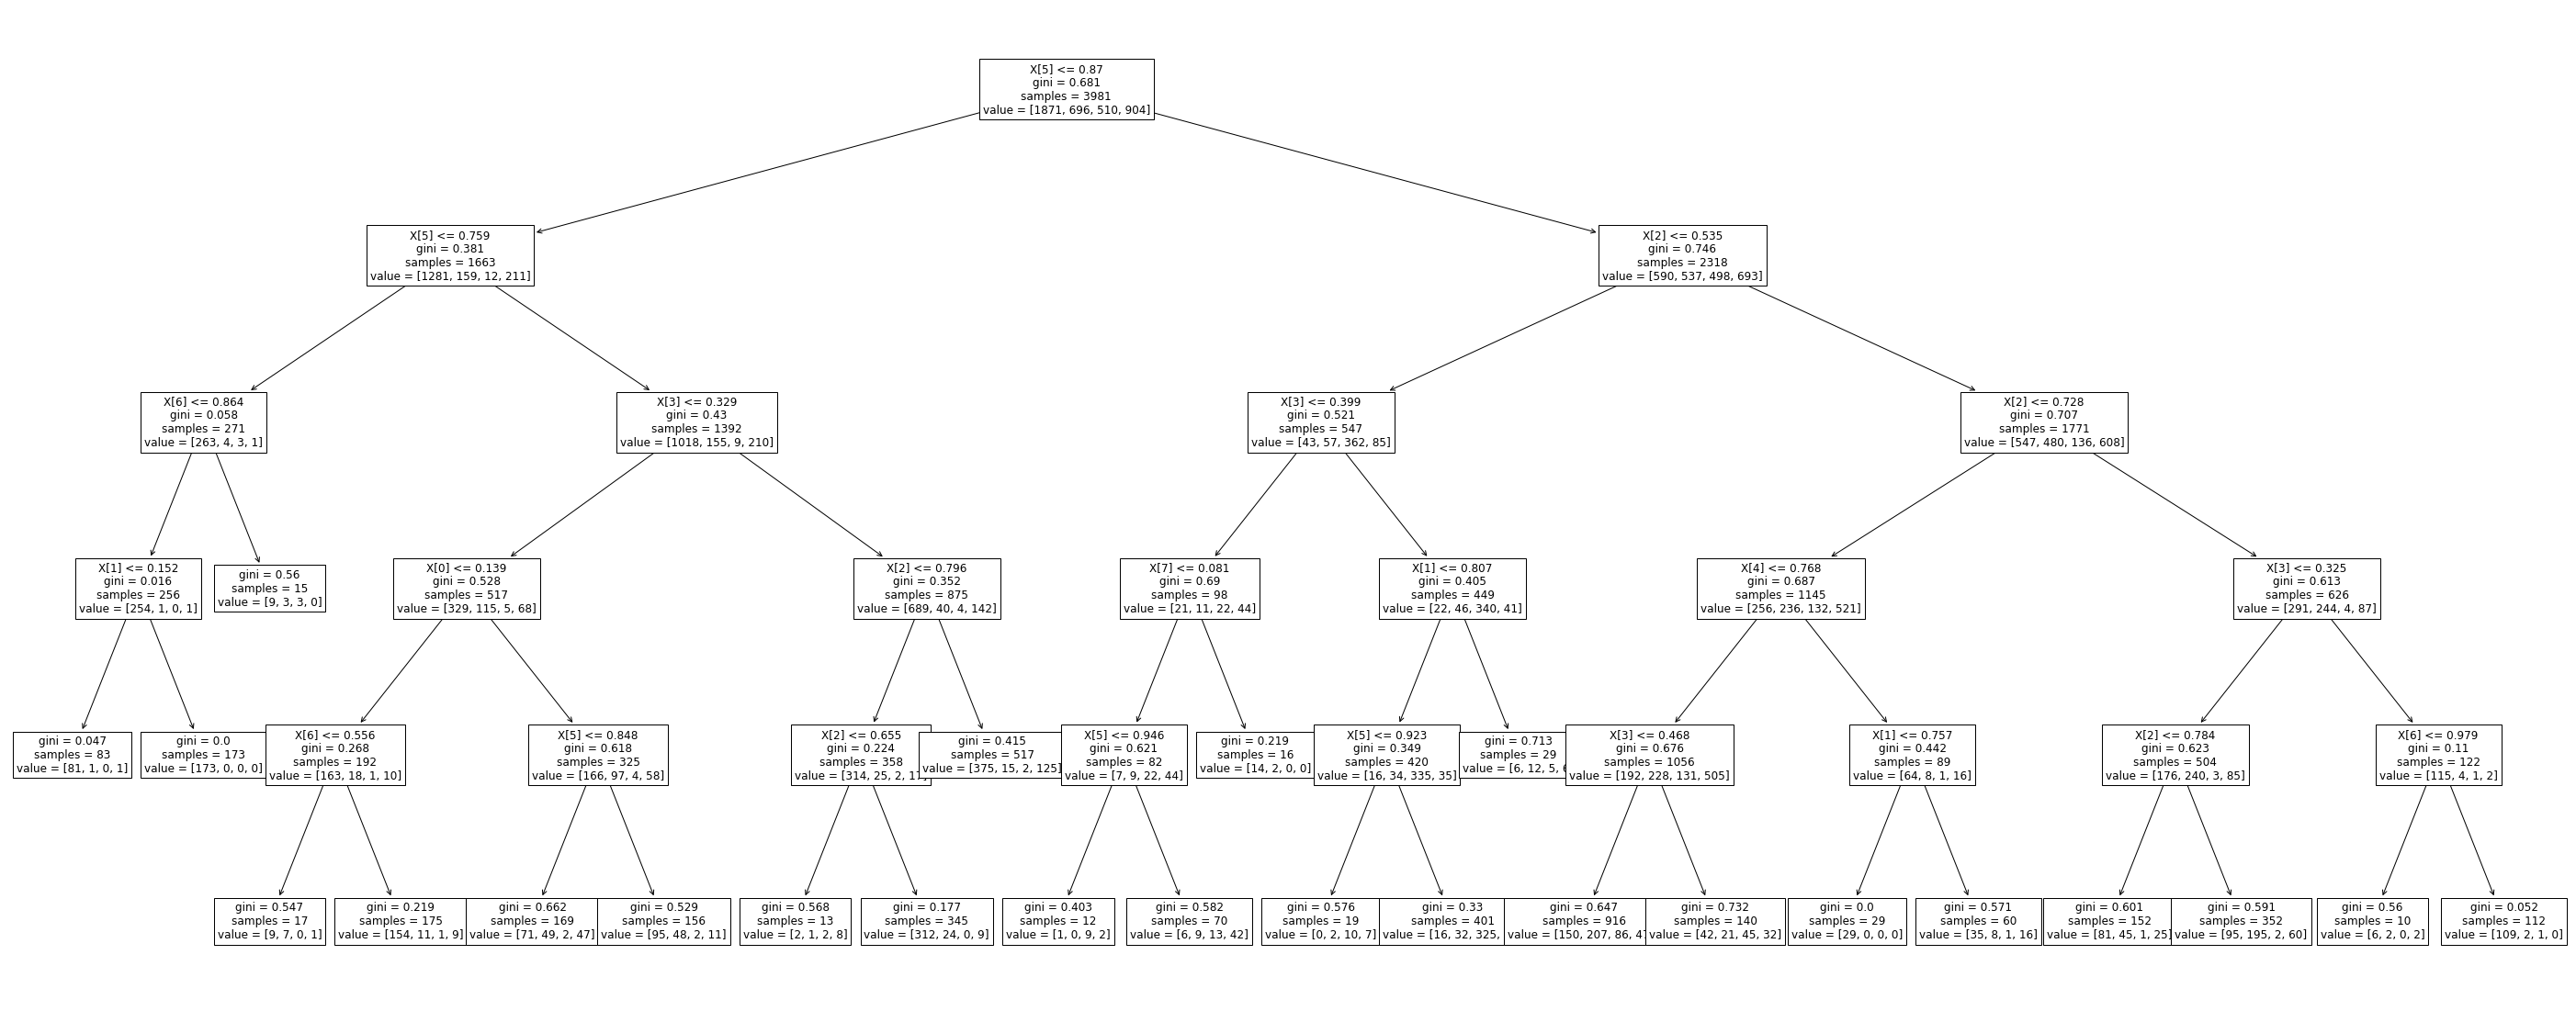

In [165]:
plt_1 = plt.figure(figsize=(50,20))
tree.plot_tree(clf, fontsize=12)
plt.show()

In [ ]:
obj.to_file("D:\\00_INPE\\0_DISSERTACAO\\0_BASE_VETOR\\SOCIOECONOMICO\\TESTE\\base_socioeconomica_interpolado.shp")